In [1]:
from video_cropper_oop import cropper, VideoCropper, CropperConfig  # 비디오 크롭퍼와 설정 클래스 임포트


YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


In [8]:
import os
import cv2
import numpy as np

def are_videos_similar(video_path1, video_path2, frame_sample_rate=30, threshold=0.99, max_frames=100):
    cap1 = cv2.VideoCapture(video_path1)
    cap2 = cv2.VideoCapture(video_path2)
    similar_frames = 0
    total_frames = 0

    while total_frames < max_frames:
        ret1 = cap1.grab()
        ret2 = cap2.grab()
        if not ret1 or not ret2:
            break
        if int(cap1.get(cv2.CAP_PROP_POS_FRAMES)) % frame_sample_rate == 0:
            ret1, frame1 = cap1.retrieve()
            ret2, frame2 = cap2.retrieve()
            if not ret1 or not ret2:
                break
            if frame1.shape != frame2.shape:
                cap1.release()
                cap2.release()
                return False
            diff = np.mean(np.abs(frame1.astype(np.float32) - frame2.astype(np.float32)))
            if diff < 1:  # 거의 동일한 프레임
                similar_frames += 1
            total_frames += 1
    cap1.release()
    cap2.release()
    if total_frames == 0:
        return False
    return (similar_frames / total_frames) > threshold

def remove_duplicate_videos(folder_path):
    video_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.mp4', '.avi', '.mov', '.mkv'))]
    unique_videos = []
    for video in video_files:
        is_unique = True
        for unique_video in unique_videos:
            if are_videos_similar(os.path.join(folder_path, video), os.path.join(folder_path, unique_video)):
                is_unique = False
                print(f"중복된 비디오 발견: {video}와 {unique_video}는 유사합니다.")    
                break
        if is_unique:
            print(f"유일한 비디오 발견: {video}")
            # 유일한 비디오를 리스트에 추가
            unique_videos.append(video)
    # 중복된 파일 삭제
    for video in video_files:
        if video not in unique_videos:
            os.remove(os.path.join(folder_path, video))
    print(f"유일한 동영상만 남겼습니다: {unique_videos}")

# 사용 예시
remove_duplicate_videos('uploads')




유일한 비디오 발견: 8475568f-33e2-4fdd-9817-6fd8f53fb95b_input.mp4
유일한 비디오 발견: 88de4206-e141-4f39-b583-237ade1e74d4_input.mov
유일한 비디오 발견: 930e910c_input.mp4
중복된 비디오 발견: ef54f731-303f-4964-a31c-269453d63b56_input.mp4와 8475568f-33e2-4fdd-9817-6fd8f53fb95b_input.mp4는 유사합니다.
유일한 비디오 발견: 5f5f36f8_input.mov
중복된 비디오 발견: e19585a2-3103-41e2-8223-9e9453b0a77b_input.mp4와 8475568f-33e2-4fdd-9817-6fd8f53fb95b_input.mp4는 유사합니다.


KeyboardInterrupt: 


image 1/1 /Users/gaaangbum/CS/side_project/O-CAE-Auto-Camera-Editing-Service-for-Climbers/scripts/temp/61a9d559/frame_20.jpg: 640x640 (no detections), 559.3ms
Speed: 6.7ms preprocess, 559.3ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


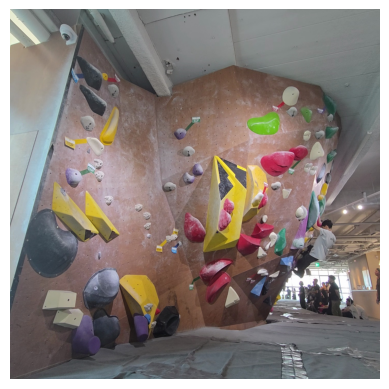

In [11]:
from ultralytics import YOLOWorld
from matplotlib import pyplot as plt
import cv2

model = YOLOWorld('yolov8l-worldv2.pt')
model.set_classes(['climber'])

results = model('temp/61a9d559/frame_20.jpg')

annotated_img = results[0].plot()

annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
plt.imshow(annotated_img)
plt.axis('off')
plt.show()

In [4]:
import os
import uuid

def rename_videos_with_uuid(folder_path):
    # 지원하는 확장자
    video_exts = ('.mp4', '.mov')
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(video_exts):
            ext = os.path.splitext(filename)[1]
            # UUID를 사용하여 새로운 이름 생성
            uuid_str = str(uuid.uuid4())[:7]
            new_name = f"video_{uuid_str}{ext}"
            src = os.path.join(folder_path, filename)
            dst = os.path.join(folder_path, new_name)
            os.rename(src, dst)
            print(f"{filename} -> {new_name}")

def rename_videos_with_index(folder_path):
    video_exts = ('.mp4', '.mov')
    video_files = [f for f in os.listdir(folder_path) if f.lower().endswith(video_exts)]
    video_files.sort()  # 정렬하여 일관된 인덱스 부여
    for idx, filename in enumerate(video_files):
        ext = os.path.splitext(filename)[1]
        new_name = f"video_{idx}{ext}"
        src = os.path.join(folder_path, filename)
        dst = os.path.join(folder_path, new_name)
        os.rename(src, dst)
        print(f"{filename} -> {new_name}")
        

# 사용 예시
# rename_videos_with_uuid('uploads')
rename_videos_with_index('uploads')

video_021f398.mp4 -> video_0.mp4
video_1707445.mov -> video_1.mov
video_1eb49ed.mp4 -> video_2.mp4
video_1f237e1.mp4 -> video_3.mp4
video_206b19e.mp4 -> video_4.mp4
video_306b05c.mp4 -> video_5.mp4
video_3a43d64.mp4 -> video_6.mp4
video_3f3ce81.MOV -> video_7.MOV
video_423bd85.mov -> video_8.mov
video_52a77d6.mp4 -> video_9.mp4
video_547fe2b.mov -> video_10.mov
video_5b0d8bd.mp4 -> video_11.mp4
video_5c7848b.mp4 -> video_12.mp4
video_66c5ecc.mp4 -> video_13.mp4
video_6927e17.mp4 -> video_14.mp4
video_7174ba0.mp4 -> video_15.mp4
video_7313d2c.mov -> video_16.mov
video_80b37a1.mov -> video_17.mov
video_8238f3e.mov -> video_18.mov
video_8945d51.mov -> video_19.mov
video_900cc79.mp4 -> video_20.mp4
video_9684db3.mp4 -> video_21.mp4
video_97e0b87.mp4 -> video_22.mp4
video_9d7bbdc.mp4 -> video_23.mp4
video_a912525.mp4 -> video_24.mp4
video_abb834f.mp4 -> video_25.mp4
video_af3c4e0.mov -> video_26.mov
video_afc7447.mov -> video_27.mov
video_c7980e1.mp4 -> video_28.mp4
video_d8142e8.mov -> vid

In [ ]:
    
    
    

# 사용 예시
rename_videos_with_index('uploads')